In [1]:
import py_wake

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from py_wake.examples.data.hornsrev1 import V80, Hornsrev1Site

In [3]:
site = Hornsrev1Site()
windTurbines = V80()

In [4]:
from py_wake import NOJ
from py_wake import Fuga
from py_wake import FugaBlockage
from py_wake import BastankhahGaussian

In [5]:
from py_wake.superposition_models import LinearSum

In [6]:
lut_path = os.path.dirname(py_wake.__file__)+'/tests/test_files/fuga/2MW/Z0=0.03000000Zi=00401Zeta0=0.00E+00.nc'

In [7]:
models = {
    'NOJ': NOJ(site, windTurbines),
    'Fuga': Fuga(lut_path, site, windTurbines),
    'FugaBlockage': FugaBlockage(lut_path, site, windTurbines),
    'BGaus': BastankhahGaussian(site, windTurbines)
}

/home/q/.local/lib/python3.10/site-packages/py_wake/deficit_models/noj.py:88: UserWarning: The NOJ model is not representative of the setup used in the literature. For this, use py_wake.literature.noj.Jensen_1983 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.noj.Jensen_1983')
/home/q/.local/lib/python3.10/site-packages/py_wake/deficit_models/fuga.py:209: UserWarning: The Fuga model is not representative of the setup used in the literature. For this, use py_wake.literature.fuga.Ott_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.fuga.Ott_2014')


/home/q/.local/lib/python3.10/site-packages/py_wake/deficit_models/fuga.py:238: UserWarning: The FugaBlockage model is not representative of the setup used in the literature. For this, use py_wake.literature.fuga.Ott_2014_Blockage instead
  DeprecatedModel.__init__(self, 'py_wake.literature.fuga.Ott_2014_Blockage')
/home/q/.local/lib/python3.10/site-packages/py_wake/deficit_models/gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')


In [8]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from py_wake.deficit_models.deficit_model import WakeDeficitModel, BlockageDeficitModel
from py_wake.deficit_models.no_wake import NoWakeDeficit
from py_wake.site._site import UniformSite
from py_wake.flow_map import XYGrid
from py_wake.turbulence_models import CrespoHernandez
from py_wake.utils.plotting import setup_plot

In [9]:
from py_wake.superposition_models import LinearSum

models['NOJLinear'] = NOJ(site,windTurbines,superpositionModel=LinearSum())

In [10]:
from py_wake.wind_farm_models import All2AllIterative
from py_wake.deficit_models import NOJDeficit, SelfSimilarityDeficit

models['NOJ_ss'] = All2AllIterative(
    site,
    windTurbines,
    wake_deficitModel=NOJDeficit(),
    superpositionModel=LinearSum(),
    blockage_deficitModel=SelfSimilarityDeficit()
)

In [11]:
TURBINE_DIAMETER = 80
WIND_SPEED = 10

def get_flow_map(
        model=None,
        grid=XYGrid(x=np.linspace(-200,500,200),y=np.linspace(-200,200,200), h=70),
        turbulenceModel=CrespoHernandez()
):
    blockage_deficitModel = model if isinstance(model, BlockageDeficitModel) else None
    wake_deficitModel = model if isinstance(model, WakeDeficitModel) else NoWakeDeficit()
    wfm = All2AllIterative(
        UniformSite(ws=WIND_SPEED),
        V80(),
        wake_deficitModel=wake_deficitModel,
        blockage_deficitModel=blockage_deficitModel,
        turbulenceModel=turbulenceModel
    )
    return wfm(x=[0], y=[0], wd=270, yaw=0).flow_map(grid)

In [12]:
def plot_deficit_map(
        model,
        cmap='coolwarm'
):
    fm = get_flow_map(model)
    fm.plot(
        (fm.ws - fm.WS_eff)/WIND_SPEED,
        clabel='Wind speed deficit [u/U]',
        cmap=cmap,
        normalize_with=TURBINE_DIAMETER,
        levels=101
    )
    setup_plot(
        grid=False,
        ylabel='Crosswind distance [y/D]',
        xlabel='Downwind distance [x/D]',
        xlim=[fm.x.min()/TURBINE_DIAMETER, fm.x.max()/TURBINE_DIAMETER],
        ylim=[fm.y.min()/TURBINE_DIAMETER, fm.y.max()/TURBINE_DIAMETER],
        axis='auto'
    )

In [13]:
def plot_wake_map(model):
    plot_deficit_map(model)

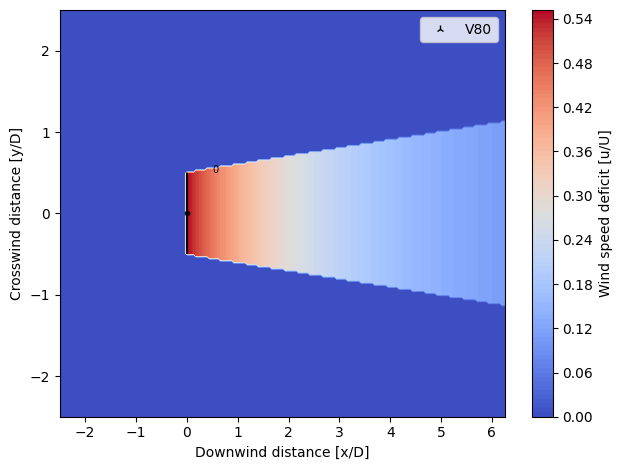

In [14]:
from py_wake.deficit_models import NOJDeficit
plot_wake_map(NOJDeficit())

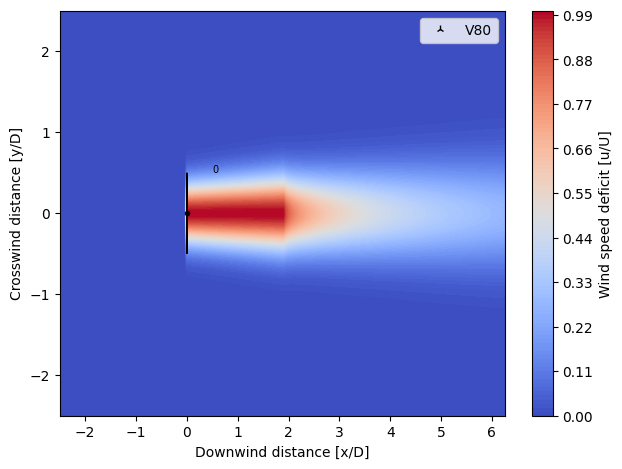

In [15]:
from py_wake.deficit_models import BastankhahGaussianDeficit
from py_wake.deficit_models.utils import ct2a_mom1d
plot_wake_map(BastankhahGaussianDeficit(ct2a=ct2a_mom1d))

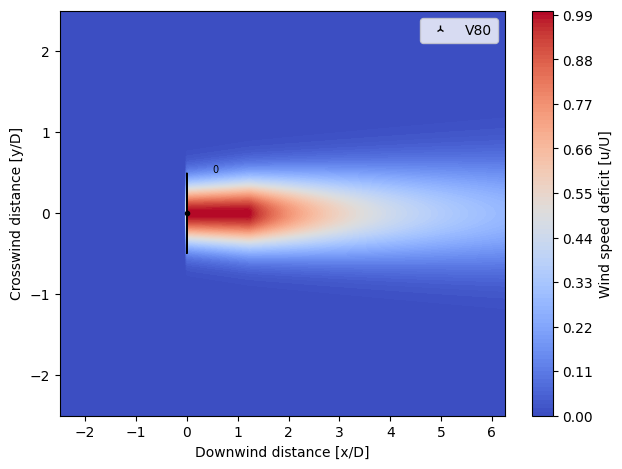

In [17]:
from py_wake.deficit_models import BastankhahGaussianDeficit
from py_wake.deficit_models.utils import ct2a_madsen
plot_wake_map(BastankhahGaussianDeficit())